In [18]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as cntrl
from matplotlib import pyplot as plt
import csv

In [19]:
excel = pd.read_excel('dataset.xlsx',sheet_name='Dataset-2')
df = pd.DataFrame(excel)
df

,KPU,PPU,PPM,PM2,LNG,LND,PM,Target
0,415.0,502.00,533.0,440.00,502.0,511.00,512.00,5
1,496.0,566.00,510.0,319.00,487.0,577.00,542.00,4
2,511.8,478.58,459.0,562.99,574.9,549.47,386.86,4
3,399.0,525.00,436.0,385.00,633.0,588.00,649.00,5
4,491.0,532.00,591.0,391.00,541.0,611.00,516.00,6
...,...,...,...,...,...,...,...,...
237,691.0,700.00,620.0,850.00,761.0,726.00,749.00,4
238,744.0,726.00,720.0,760.00,681.0,690.00,774.00,5
239,734.0,620.00,728.0,900.00,736.0,704.00,683.00,3
240,824.0,711.00,715.0,651.00,736.0,662.00,811.00,5


In [3]:
kpu = df['KPU']
ppu = df['PPU']
ppm = df['PPM']
pm2 = df['PM2']
lng = df['LNG']
lnd = df['LND']
pm = df['PM']

KPU

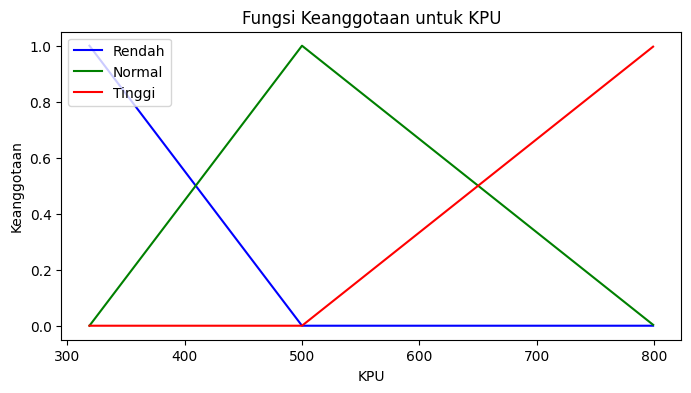

In [4]:
low = 319
mid = 500
high = 800
# kpu = ctrl.Antecedent(np.arange(min_kpu, max_kpu, 1), 'kpu')
x_kpu = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
kpu_rendah = fuzz.trimf(x_kpu, [low, low,mid])
kpu_normal = fuzz.trimf(x_kpu, [low, mid, high])
kpu_tinggi = fuzz.trimf(x_kpu, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_kpu, kpu_rendah, 'b', label='Rendah')
plt.plot(x_kpu, kpu_normal, 'g', label='Normal')
plt.plot(x_kpu, kpu_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk KPU')
plt.xlabel('KPU')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [5]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_kpu(nilai):
    derajat_rendah = fuzz.interp_membership(x_kpu, kpu_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_kpu, kpu_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_kpu, kpu_tinggi, nilai)
    return derajat_rendah, derajat_normal, derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_kpu.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['KPU'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai KPU
    for i in kpu:
        hasil_rendah, hasil_normal,  hasil_tinggi,  = fuzzifikasi_nilai_kpu(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal, hasil_tinggi])
        # print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_kpu.csv")

Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_kpu.csv


PPU

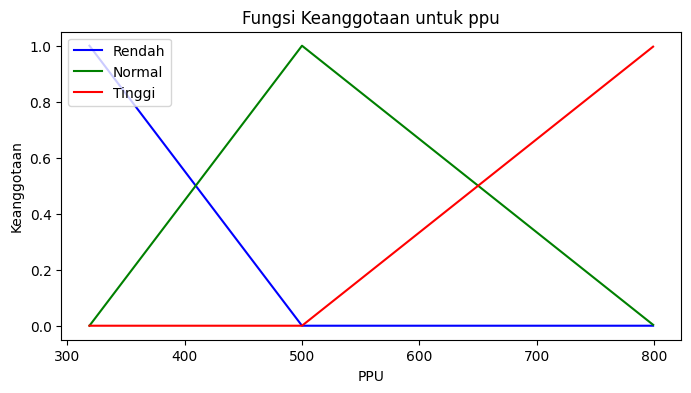

In [6]:
low = 319
mid = 500
high = 800
# ppu = ctrl.Antecedent(np.arange(min_ppu, max_ppu, 1), 'ppu')
x_ppu = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
ppu_rendah = fuzz.trimf(x_ppu, [low, low,mid])
ppu_normal = fuzz.trimf(x_ppu, [low, mid, high])
ppu_tinggi = fuzz.trimf(x_ppu, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_ppu, ppu_rendah, 'b', label='Rendah')
plt.plot(x_ppu, ppu_normal, 'g', label='Normal')
plt.plot(x_ppu, ppu_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk ppu')
plt.xlabel('PPU')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [7]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_ppu(nilai):
    derajat_rendah = fuzz.interp_membership(x_ppu, ppu_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_ppu, ppu_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_ppu, ppu_tinggi, nilai)
    return derajat_rendah, derajat_normal, derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_ppu.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['ppu'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai ppu
    for i in ppu:
        hasil_rendah, hasil_normal,  hasil_tinggi = fuzzifikasi_nilai_ppu(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal,  hasil_tinggi])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_ppu.csv")

1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
2
1
2
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
1
1
2
2
1
2
1
2
1
1
1
1
2
2
2
2
1
1
2
2
1
2
2
2
1
1
2
2
1
2
0
2
1
1
1
1
2
1
2
2
1
2
2
2
1
1
1
1
1
1
1
2
1
1
1
2
2
2
1
2
1
1
1
1
2
1
2
1
2
2
1
2
2
1
2
1
2
1
2
1
2
2
2
2
2
1
2
2
2
1
1
2
2
2
2
0
2
2
2
1
2
1
2
2
1
2
2
1
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
1
2
2
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_ppu.csv


PPM

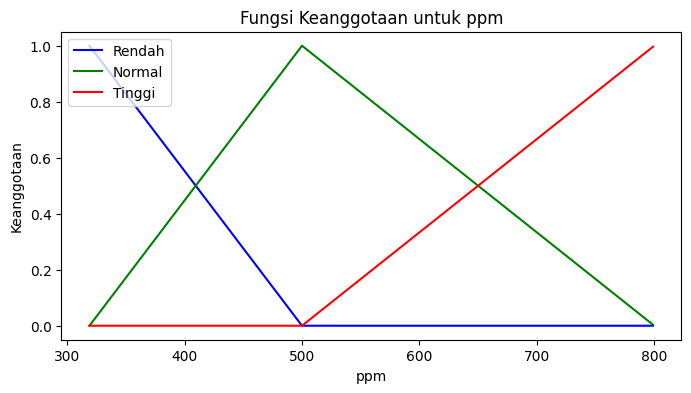

In [8]:
low = 319
mid = 500
high = 800
# ppm = ctrl.Antecedent(np.arange(min_ppm, max_ppm, 1), 'ppm')
x_ppm = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
ppm_rendah = fuzz.trimf(x_ppm, [low, low,mid])
ppm_normal = fuzz.trimf(x_ppm, [low, mid, high])
ppm_tinggi = fuzz.trimf(x_ppm, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_ppm, ppm_rendah, 'b', label='Rendah')
plt.plot(x_ppm, ppm_normal, 'g', label='Normal')
plt.plot(x_ppm, ppm_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk ppm')
plt.xlabel('ppm')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [9]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_ppm(nilai):
    derajat_rendah = fuzz.interp_membership(x_ppm, ppm_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_ppm, ppm_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_ppm, ppm_tinggi, nilai)
    return derajat_rendah, derajat_normal,derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_ppm.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['ppm'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai ppm
    for i in ppm:
        hasil_rendah, hasil_normal, hasil_tinggi,  = fuzzifikasi_nilai_ppm(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal,  hasil_tinggi, ])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_ppm.csv")

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
2
2
2
1
1
1
1
2
1
2
2
2
1
1
1
1
2
2
2
1
1
2
1
1
2
1
2
1
2
1
2
1
2
1
1
1
1
2
1
2
1
1
2
1
2
1
1
1
1
2
2
2
1
1
2
2
1
2
1
1
1
1
1
1
2
2
2
1
2
2
1
2
2
2
2
0
2
2
2
2
1
1
2
1
1
2
2
1
1
2
2
1
2
1
2
1
2
1
1
1
2
2
2
2
1
2
1
2
2
2
1
2
2
2
1
2
2
2
2
1
2
0
2
2
2
2
2
2
2
2
1
1
2
2
2
1
2
2
2
1
2
2
2
1
2
1
2
2
2
1
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_ppm.csv


PM2

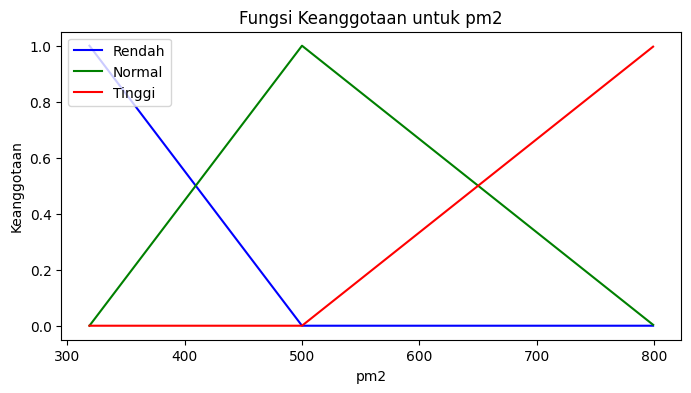

In [10]:
low = 319
mid = 500
high = 800
# pm2 = ctrl.Antecedent(np.arange(min_pm2, max_pm2, 1), 'pm2')
x_pm2 = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
pm2_rendah = fuzz.trimf(x_pm2, [low, low,mid])
pm2_normal = fuzz.trimf(x_pm2, [low, mid, high])
pm2_tinggi = fuzz.trimf(x_pm2, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_pm2, pm2_rendah, 'b', label='Rendah')
plt.plot(x_pm2, pm2_normal, 'g', label='Normal')
plt.plot(x_pm2, pm2_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk pm2')
plt.xlabel('pm2')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_pm2(nilai):
    derajat_rendah = fuzz.interp_membership(x_pm2, pm2_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_pm2, pm2_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_pm2, pm2_tinggi, nilai)
    return derajat_rendah, derajat_normal, derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_pm2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['pm2'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai pm2
    for i in pm2:
        hasil_rendah, hasil_normal,  hasil_tinggi,  = fuzzifikasi_nilai_pm2(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal,  hasil_tinggi, ])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_pm2.csv")

1
0
1
0
0
1
0
1
1
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
2
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
0
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
2
2
2
1
0
2
2
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
2
1
1
2
1
1
1
2
1
1
2
1
0
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
0
2
2
2
2
2
1
2
2
0
1
2
2
1
2
0
2
1
2
2
1
2
1
1
1
2
2
1
2
2
2
2
2
1
2
1
2
1
2
2
2
1
2
0
2
2
2
1
2
2
2
0
0
0
2
1
0
2
2
2
0
2
2
0
0
0
2
0
0
0
2
2
2
2
2
0
2
0
2
2
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_pm2.csv


LNG

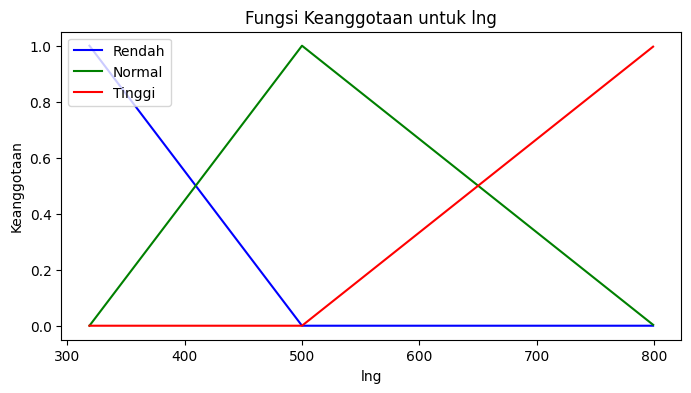

In [20]:
low = 319
mid = 500
high = 800
# lng = ctrl.Antecedent(np.arange(min_lng, max_lng, 1), 'lng')
x_lng = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
lng_rendah = fuzz.trimf(x_lng, [low, low,mid])
lng_normal = fuzz.trimf(x_lng, [low, mid, high])
lng_tinggi = fuzz.trimf(x_lng, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_lng, lng_rendah, 'b', label='Rendah')
plt.plot(x_lng, lng_normal, 'g', label='Normal')
plt.plot(x_lng, lng_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk lng')
plt.xlabel('lng')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [13]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_lng(nilai):
    derajat_rendah = fuzz.interp_membership(x_lng, lng_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_lng, lng_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_lng, lng_tinggi, nilai)
    return derajat_rendah, derajat_normal,derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_lng.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['lng'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai lng
    for i in lng:
        hasil_rendah, hasil_normal, hasil_tinggi,  = fuzzifikasi_nilai_lng(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal, hasil_tinggi])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_lng.csv")

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
2
1
1
1
1
2
2
1
2
1
1
1
1
2
1
1
1
1
1
2
1
2
2
1
1
1
1
2
1
1
1
1
2
2
2
1
1
2
2
1
2
1
1
2
1
2
2
2
1
2
1
2
1
2
2
1
1
2
2
2
1
1
1
2
1
1
1
1
2
1
2
2
1
2
1
2
1
2
1
2
2
2
2
0
2
2
2
2
1
1
1
1
2
1
2
2
2
2
2
2
1
2
2
2
2
1
2
1
2
2
2
2
0
2
2
1
1
2
1
2
1
1
2
2
1
2
2
2
1
1
1
2
1
2
1
0
2
2
2
1
1
1
2
1
2
2
1
2
0
2
2
1
2
1
1
2
1
1
2
2
2
2
2
1
0
2
0
2
0
2
2
2
2
2
2
2
1
2
2
2
1
1
2
2
2
1
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_lng.csv


LND

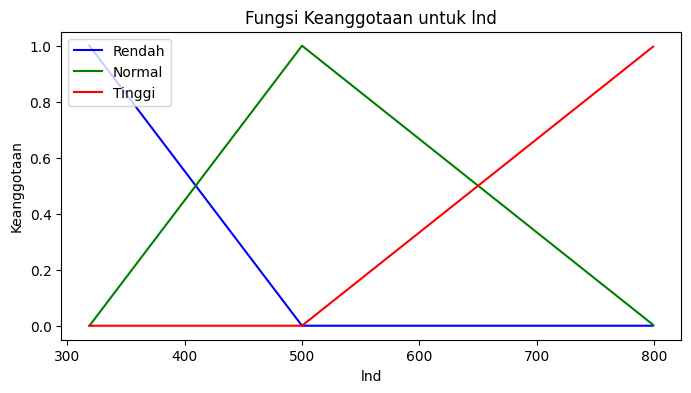

In [14]:
low = 319
mid = 500
high = 800
# lnd = ctrl.Antecedent(np.arange(min_lnd, max_lnd, 1), 'lnd')
x_lnd = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
lnd_rendah = fuzz.trimf(x_lnd, [low, low,mid])
lnd_normal = fuzz.trimf(x_lnd, [low, mid, high])
lnd_tinggi = fuzz.trimf(x_lnd, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_lnd, lnd_rendah, 'b', label='Rendah')
plt.plot(x_lnd, lnd_normal, 'g', label='Normal')
plt.plot(x_lnd, lnd_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk lnd')
plt.xlabel('lnd')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [15]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_lnd(nilai):
    derajat_rendah = fuzz.interp_membership(x_lnd, lnd_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_lnd, lnd_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_lnd, lnd_tinggi, nilai)
    return derajat_rendah, derajat_normal,derajat_tinggi

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_lnd.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['lnd'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai lnd
    for i in lnd:
        hasil_rendah, hasil_normal,  hasil_tinggi = fuzzifikasi_nilai_lnd(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal,  hasil_tinggi])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_lnd.csv")

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
2
1
2
2
1
1
1
2
1
1
2
1
2
2
1
1
1
1
1
2
1
1
1
1
2
2
2
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
2
1
1
1
1
2
1
1
2
1
1
2
2
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
2
2
1
1
2
1
1
2
2
2
2
2
1
1
2
2
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
2
1
1
1
1
2
1
2
2
1
2
2
1
1
1
2
1
2
1
1
2
2
1
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_lnd.csv


PM

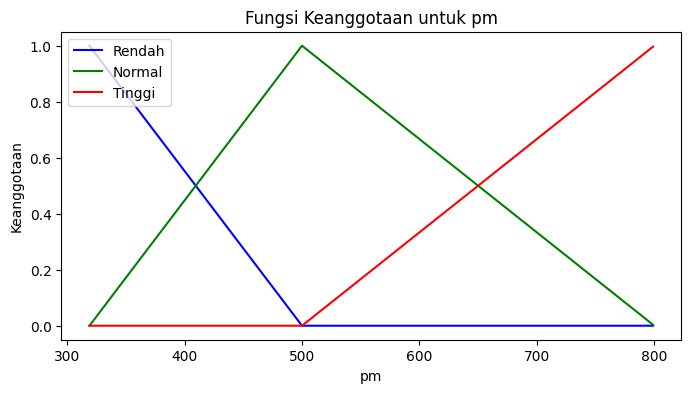

In [16]:
low = 319
mid = 500
high = 800
# pm = ctrl.Antecedent(np.arange(min_pm, max_pm, 1), 'pm')
x_pm = np.arange(low, high, 1)
# Definisikan fungsi keanggotaan untuk setiap kategori
pm_rendah = fuzz.trimf(x_pm, [low, low,mid])
pm_normal = fuzz.trimf(x_pm, [low, mid, high])
pm_tinggi = fuzz.trimf(x_pm, [mid, high,high])

plt.figure(figsize=(8, 4))
plt.plot(x_pm, pm_rendah, 'b', label='Rendah')
plt.plot(x_pm, pm_normal, 'g', label='Normal')
plt.plot(x_pm, pm_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan untuk pm')
plt.xlabel('pm')
plt.ylabel('Keanggotaan')
plt.legend(loc='upper left')
plt.show()

In [17]:
# Fungsi untuk melakukan fuzzifikasi
def fuzzifikasi_nilai_pm(nilai):
    derajat_rendah = fuzz.interp_membership(x_pm, pm_rendah, nilai)
    derajat_normal = fuzz.interp_membership(x_pm, pm_normal, nilai)
    derajat_tinggi = fuzz.interp_membership(x_pm, pm_tinggi, nilai)
    return derajat_rendah, derajat_normal, derajat_tinggi, 

# Buka file CSV untuk menulis
with open('hasil fuzzifikasi/hasil_fuzzifikasi_pm.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Tulis header
    writer.writerow(['pm'])

    # Melakukan fuzzifikasi dan defuzzifikasi untuk setiap nilai pm
    for i in pm:
        hasil_rendah, hasil_normal,  hasil_tinggi,  = fuzzifikasi_nilai_pm(i)
        
        # Menentukan nilai defuzzifikasi berdasarkan derajat keanggotaan tertinggi
        nilai_defuzzifikasi = np.argmax([hasil_rendah, hasil_normal,  hasil_tinggi, ])
        print(nilai_defuzzifikasi)
        # Tulis hasil ke file CSV
        writer.writerow([nilai_defuzzifikasi])

print("Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_pm.csv")

1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
2
1
2
2
1
1
1
1
1
1
2
2
1
2
1
1
1
1
1
1
2
1
1
1
1
2
2
2
1
2
1
2
1
1
1
1
0
2
2
1
1
1
1
2
1
1
0
1
2
1
1
2
2
0
2
1
1
2
2
2
2
2
1
1
2
1
2
2
2
1
1
1
1
1
1
2
2
2
2
0
1
2
2
2
2
2
2
2
2
2
0
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
1
1
1
2
0
1
1
2
0
2
2
1
2
2
2
1
0
2
1
2
1
0
2
0
0
2
2
2
0
0
2
2
2
0
0
Hasil fuzzifikasi telah disimpan ke file hasil_fuzzifikasi_pm.csv
